In [1]:
import numpy as np
import pandas as pd
import scipy.signal as sig
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from glob import glob

def log_law(u_star, z, z0, kappa=0.4187):
    return (u_star / kappa) * np.log(z / z0)

def inv_log_law(u_star, u, z0, kappa=0.4187):
    return z0 * np.exp(u * kappa / u_star)

In [2]:
#Importing empty case data
empty_case_data = pd.read_csv("empty_profile_data.txt", sep="\t")
empty_case_data.columns = ["$z [mm]$", "$u [ms^{-1}]$", "$I_u [\%]$", "$u/u_{ref} [-]$"]
display(Markdown("Empty case mean data = " + f"{empty_case_data.to_latex(index=False, float_format='%.7g')}"))

empty_case = empty_case_data.to_numpy()


<>:3: SyntaxWarning: invalid escape sequence '\%'
<>:3: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_1043642/656679216.py:3: SyntaxWarning: invalid escape sequence '\%'
  empty_case_data.columns = ["$z [mm]$", "$u [ms^{-1}]$", "$I_u [\%]$", "$u/u_{ref} [-]$"]


Empty case mean data = \begin{tabular}{rrrr}
\toprule
$z [mm]$ & $u [ms^{-1}]$ & $I_u [\%]$ & $u/u_{ref} [-]$ \\
\midrule
30 & 4.114 & 9.69 & 0.8809422 \\
40 & 4.262 & 8.77 & 0.9126338 \\
50 & 4.367 & 8.2 & 0.9351178 \\
60 & 4.444 & 7.673 & 0.951606 \\
70 & 4.541 & 7.155 & 0.9723769 \\
80 & 4.582 & 6.903 & 0.9811563 \\
90 & 4.634 & 6.616 & 0.9922912 \\
100 & 4.67 & 6.461 & 1 \\
120 & 4.748 & 5.979 & 1.016702 \\
140 & 4.809 & 5.498 & 1.029764 \\
160 & 4.849 & 5.404 & 1.03833 \\
180 & 4.905 & 5.107 & 1.050321 \\
200 & 4.936 & 4.941 & 1.056959 \\
250 & 5.022 & 4.34 & 1.075375 \\
300 & 5.069 & 3.691 & 1.085439 \\
350 & 5.091 & 2.869 & 1.09015 \\
400 & 5.103 & 2.337 & 1.092719 \\
450 & 5.098 & 2.043 & 1.091649 \\
500 & 5.059 & 2.05 & 1.083298 \\
550 & 5.019 & 2.011 & 1.074732 \\
\bottomrule
\end{tabular}


In [3]:
#Importing abl case data
abl_case_data = pd.read_csv("abl_profile_data.txt", sep="\t")
abl_case_data.columns = ["$z [mm]$", "$u [ms^{-1}]$", "$I_u [\%]$", "$u/u_{ref} [-]$"]
display(Markdown("ABL case mean data = " + f"{abl_case_data.to_latex(index=False, float_format='%.7g')}"))

abl_case = abl_case_data.to_numpy()

<>:3: SyntaxWarning: invalid escape sequence '\%'
<>:3: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_1043642/137753662.py:3: SyntaxWarning: invalid escape sequence '\%'
  abl_case_data.columns = ["$z [mm]$", "$u [ms^{-1}]$", "$I_u [\%]$", "$u/u_{ref} [-]$"]


ABL case mean data = \begin{tabular}{rrrr}
\toprule
$z [mm]$ & $u [ms^{-1}]$ & $I_u [\%]$ & $u/u_{ref} [-]$ \\
\midrule
37 & 2.731902 & 22.03383 & 0.8253662 \\
42 & 2.846592 & 21.50766 & 0.8600165 \\
47 & 2.9124 & 21.20494 & 0.8798986 \\
52 & 2.919821 & 21.21975 & 0.8821406 \\
57 & 2.977685 & 21.58358 & 0.8996226 \\
62 & 3.018937 & 21.17446 & 0.9120857 \\
67 & 3.052298 & 20.83525 & 0.9221647 \\
72 & 3.157995 & 20.30186 & 0.9540981 \\
77 & 3.146894 & 20.64043 & 0.9507442 \\
82 & 3.134718 & 19.66591 & 0.9470656 \\
92 & 3.237059 & 19.86622 & 0.977985 \\
102 & 3.309927 & 19.14412 & 1 \\
112 & 3.388611 & 18.73385 & 1.023772 \\
122 & 3.530555 & 16.82001 & 1.066656 \\
132 & 3.449828 & 18.55019 & 1.042267 \\
142 & 3.603852 & 17.26592 & 1.088801 \\
152 & 3.610914 & 17.64061 & 1.090935 \\
172 & 3.684959 & 16.91745 & 1.113305 \\
192 & 3.730265 & 17.39069 & 1.126993 \\
212 & 3.884466 & 16.11505 & 1.173581 \\
232 & 3.936609 & 15.7707 & 1.189334 \\
252 & 3.979068 & 15.7652 & 1.202162 \\
272 & 4.059389 & 14.78966 & 1.226429 \\
292 & 4.113781 & 14.86066 & 1.242862 \\
312 & 4.1063 & 14.42655 & 1.240601 \\
332 & 4.250597 & 14.27255 & 1.284197 \\
352 & 4.221111 & 14.4704 & 1.275288 \\
372 & 4.291578 & 14.08922 & 1.296578 \\
392 & 4.342524 & 14.05546 & 1.31197 \\
412 & 4.441552 & 13.80388 & 1.341888 \\
432 & 4.405212 & 13.95879 & 1.330909 \\
502 & 4.477661 & 13.60337 & 1.352798 \\
552 & 4.652973 & 12.4317 & 1.405763 \\
602 & 4.767695 & 12.53999 & 1.440423 \\
652 & 4.853394 & 11.45762 & 1.466315 \\
700 & 4.965742 & 11.21763 & 1.500257 \\
\bottomrule
\end{tabular}


# Task-a

## Mean velocity profile

Text(0.5, 1.0, 'Mean velocity profiles')

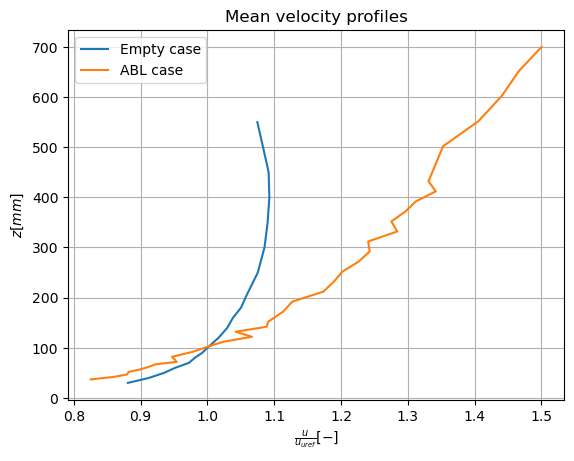

In [4]:
#Plotting mean velocity profiles
fig_a1, ax_a1 = plt.subplots()
ax_a1.plot(empty_case[:,3], empty_case[:,0], label="Empty case")
ax_a1.plot(abl_case[:,3], abl_case[:,0], label="ABL case")
ax_a1.set_xlabel(r"$\frac{u}{u_{uref}} [-]$")
ax_a1.set_ylabel(r"$z [mm]$")
ax_a1.legend()
ax_a1.grid()
ax_a1.set_title("Mean velocity profiles")

For the abl case, the near wall vertical velocity gradient is steeper than the empty case. Higher velocity gradient corresponds to higher visous drag at the wall.

## Turbulence intensity profile

Text(0.5, 1.0, 'Turbulence intensity profiles')

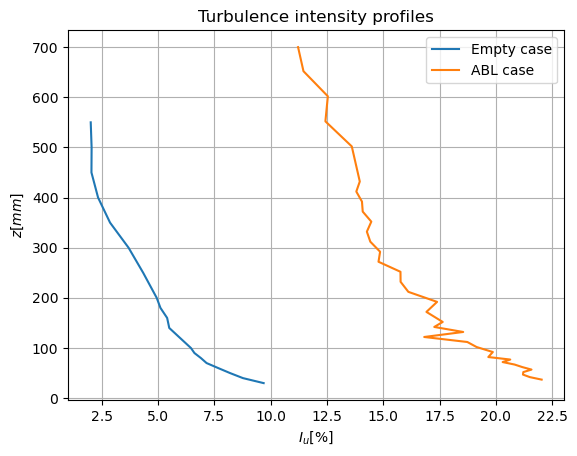

In [5]:
#Plotting turbulence intensity profiles
fig_a2, ax_a2 = plt.subplots()
ax_a2.plot(empty_case[:,2], empty_case[:,0], label="Empty case")
ax_a2.plot(abl_case[:,2], abl_case[:,0], label="ABL case")
ax_a2.set_xlabel(r"$I_u [\%]$")
ax_a2.set_ylabel(r"$z [mm]$")
ax_a2.legend()
ax_a2.grid()
ax_a2.set_title("Turbulence intensity profiles")

For both the cases, turbulence intensity is higher in the vicinity of the wall than in in the outer flow. Velocity fluctuations are significant for the abl case in comparison to the empty case. At vertical distances 450 [mm] and above the wall, the turbulence intensity is low around 2\% for the empty case, denoting the transition to laminar flow in the freestream.

# Question-b

According to log law:

$$\frac{u}{u_*} = \frac{1}{\kappa}\ln\left(\frac{z}{z_0}\right)$$

It can be simplified as:

$$\ln z = \left(\frac{\kappa}{u_*}\right)u + \ln z_0$$

The log law can also be interpreted as linear relationship between $\ln z$ and $u$ with slope as $\frac{\kappa}{u_*}$ and intercept as $\ln z_0$. Through the parameters of linear fit, roughness height $z_0$ and shear velocity $u_*$ can be inferred.

Text(0.5, 1.0, 'Empty case log law profile')

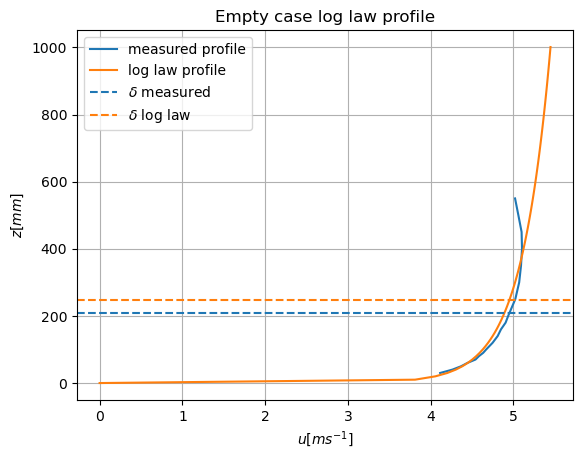

In [6]:
#Empty case
z_empty = empty_case[:,0]
ln_z_empty = np.log(z_empty)

u_empty = empty_case[:,1]
kappa = 0.4187
u_empty_inf = 5
u_empty_z99 = 0.99 * u_empty_inf
delta_empty = np.interp(u_empty_z99, u_empty, z_empty)

kappa_ustar_empty, ln_z0_empty = np.polyfit(u_empty, ln_z_empty, 1)

z0_empty = np.exp(ln_z0_empty)
ustar_empty = kappa/kappa_ustar_empty
u_empty_log_law = log_law(ustar_empty, z_empty, z0_empty)
error_empty = u_empty - u_empty_log_law
delta_empty_log_law = inv_log_law(ustar_empty, u_empty_z99, z0_empty)

#Plotting empty case log law
plot_z_empty = np.linspace(z0_empty, 1001, 101)
fig_b1, ax_b1 = plt.subplots()
ax_b1.plot(u_empty, z_empty, label="measured profile")
ax_b1.plot(log_law(ustar_empty, plot_z_empty, z0_empty), plot_z_empty, label="log law profile")
ax_b1.axhline(y=delta_empty, color='tab:blue', linestyle='--', label=r"$\delta$ measured")
ax_b1.axhline(y=delta_empty_log_law, color='tab:orange', linestyle='--', label=r"$\delta$ log law")
ax_b1.set_xlabel(r"$u [ms^{-1}]$")
ax_b1.set_ylabel(r"$z [mm]$")
ax_b1.legend()
ax_b1.grid()
ax_b1.set_title("Empty case log law profile")


Text(0.5, 1.0, 'ABL case log law profile')

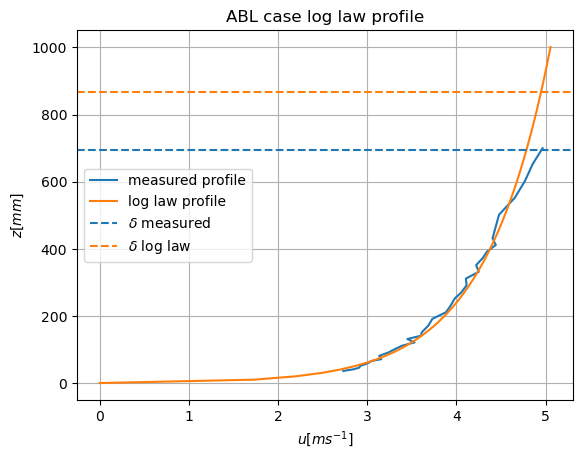

In [7]:
#ABL case
z_abl = abl_case[:,0]
ln_z_abl = np.log(z_abl)

u_abl = abl_case[:,1]
u_abl_inf = 5
u_abl_z99 = 0.99 * u_abl_inf
delta_abl = np.interp(u_abl_z99, u_abl, z_abl)

kappa_ustar_abl, ln_z0_abl = np.polyfit(u_abl, ln_z_abl, 1)

z0_abl = np.exp(ln_z0_abl)
ustar_abl = kappa/kappa_ustar_abl
u_abl_log_law = log_law(ustar_abl, z_abl, z0_abl)
error_abl = u_abl - u_abl_log_law
delta_abl_log_law = inv_log_law(ustar_abl, u_abl_z99, z0_abl)

#Plotting abl case log law
plot_z_abl = np.linspace(z0_abl, 1001, 101)
fig_b2, ax_b2 = plt.subplots()
ax_b2.plot(u_abl, z_abl, label="measured profile")
ax_b2.plot(log_law(ustar_abl, plot_z_abl, z0_abl), plot_z_abl, label="log law profile")
ax_b2.axhline(y=delta_abl, color='tab:blue', linestyle='--', label=r"$\delta$ measured")
ax_b2.axhline(y=delta_abl_log_law, color='tab:orange', linestyle='--', label=r"$\delta$ log law")
ax_b2.set_xlabel(r"$u [ms^{-1}]$")
ax_b2.set_ylabel(r"$z [mm]$")
ax_b2.legend()
ax_b2.grid()
ax_b2.set_title("ABL case log law profile")

In [8]:
#Question-b table

qb_table = pd.DataFrame(columns=["$z_0 [mm]$", "$u_* [ms-1]$", "measured $\delta [mm]$", "log law $\delta [mm]$"])
qb_table.loc["Empty case"] = [z0_empty, ustar_empty, delta_empty, delta_empty_log_law]
qb_table.loc["ABL case"] = [z0_abl, ustar_abl, delta_abl, delta_abl_log_law]
display(Markdown("Question-b results" + f"{qb_table.to_latex(float_format='%.7g')}"))

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_1043642/1761245083.py:3: SyntaxWarning: invalid escape sequence '\d'
  qb_table = pd.DataFrame(columns=["$z_0 [mm]$", "$u_* [ms-1]$", "measured $\delta [mm]$", "log law $\delta [mm]$"])
/tmp/ipykernel_1043642/1761245083.py:3: SyntaxWarning: invalid escape sequence '\d'
  qb_table = pd.DataFrame(columns=["$z_0 [mm]$", "$u_* [ms-1]$", "measured $\delta [mm]$", "log law $\delta [mm]$"])


Question-b results\begin{tabular}{lrrrr}
\toprule
 & $z_0 [mm]$ & $u_* [ms-1]$ & measured $\delta [mm]$ & log law $\delta [mm]$ \\
\midrule
Empty case & 0.0002204798 & 0.1487951 & 208.1395 & 246.9733 \\
ABL case & 1.076467 & 0.3096505 & 693.2743 & 868.6364 \\
\bottomrule
\end{tabular}


Roughness height, Shear velocity and boundary layer thickness are larger for ABL case in comparison to empty case. Due to the presence of the blocks in the ABL case, the roughness height is higher. Shear velocity is higher for the ABL case because of the increased turbulence contribution from the surface roughness. As a consequence of increased turbulence, flow in the ABL case will require larger wall distance to attain the freestream velocity, manifesting as larger measured boundary layer thickness for the ABL case. Larger boundary layer thickness causes increased pressure drag for the ABL case.

From the plots it can be seen that the log law profile is in good agreement with the measured profile for most of the measured boundary layer region. It is only near the outer boundary of the boundary layer that the log law exhibits deviation from the measured values. This is because the outer boundary corresponds to the outer layer region of the boundary layer, where log-law is not applicable. As a results of this limitation, log-law overpredicts the boundary layer thickness for both the empty and ABL cases in comparison to the measured thickness.

# Question-c

Turbulence length scale is related to the time scale by $Lu_x = Tu_x\cdot\bar{u}$

Turbulence time scale can be obtained by temporal integration of the normalized autocorrelation function $Tu_x = \int_0^\infty r(\tau)d\tau$.  Normalized autocorrelation function is $r(\tau) = \frac{\overline{u'(t)u'(t+\tau)}}{\overline{u'^2}}$

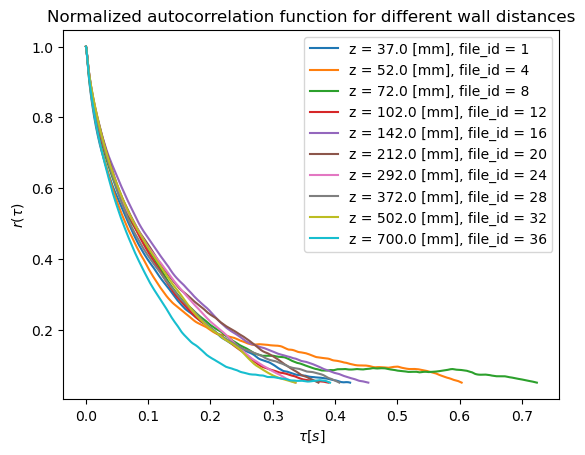

In [ ]:
#Importing abl raw data
abl_raw_file_list = sorted(glob("ABL_EL_5_3_SP_7.W/*"))

abl_time_scale_arr = np.zeros(len(abl_raw_file_list))
norm_corr_crit = 0.05 #Correlation values below 0.05 is ignored for time scale calculation

for i, file in enumerate(abl_raw_file_list):
    
    case_id = int(file.split(".")[-1][-4:])
    
    data = np.loadtxt(file)
    dt = data[1, 0] - data[0, 0]
    u_mean = np.mean(data[:, 1])
    u_prime = data[:, 1] - u_mean
    
    u_prime_sq = u_prime ** 2
    mean_u_prime_sq = np.mean(u_prime_sq)
    
    u_prime_corr = sig.correlate(u_prime, u_prime, mode='full')[len(u_prime)-1:]
    mean_u_prime_corr = u_prime_corr/len(u_prime)
    norm_u_prime_corr = mean_u_prime_corr/mean_u_prime_sq
    cutoff_index = np.argwhere(norm_u_prime_corr < norm_corr_crit)[0,0]
    tau = np.arange(cutoff_index)*dt
    time_scale = np.trapz(norm_u_prime_corr[:cutoff_index], tau)
    abl_time_scale_arr[i] = time_scale
    
    if case_id == 1 or case_id % 4 == 0:
        plt.plot(tau, norm_u_prime_corr[:cutoff_index], label=f"z = {abl_case[case_id-1, 0]} [mm], file_id = {case_id}")
        plt.legend()
        plt.xlabel(r"$\tau [s]$")
        plt.ylabel(r"$r(\tau)$")
        plt.title("Normalized autocorrelation function for different wall distances")
    

In [11]:
#Question-c table

qc_table = pd.DataFrame(columns=["$z [mm]$", "$Tu_x [s]$", "$Lu_x$ [m]"])
qc_table["$z [mm]$"] = abl_case[:,0]
qc_table["$Tu_x [s]$"] = abl_time_scale_arr
qc_table["$Lu_x$ [m]"] = qc_table["$Tu_x [s]$"] * abl_case[:,1]

display(Markdown("Question-c results" + f"{qc_table.to_latex(index=False, float_format='%.4g')}"))

Question-c results\begin{tabular}{rrr}
\toprule
$z [mm]$ & $Tu_x [s]$ & $Lu_x$ [m] \\
\midrule
37 & 0.1123 & 0.3069 \\
42 & 0.1294 & 0.3683 \\
47 & 0.1047 & 0.3048 \\
52 & 0.1347 & 0.3932 \\
57 & 0.1185 & 0.3529 \\
62 & 0.1752 & 0.529 \\
67 & 0.1563 & 0.4771 \\
72 & 0.1447 & 0.457 \\
77 & 0.1272 & 0.4003 \\
82 & 0.1388 & 0.4352 \\
92 & 0.1223 & 0.3959 \\
102 & 0.1123 & 0.3717 \\
112 & 0.1215 & 0.4118 \\
122 & 0.09992 & 0.3528 \\
132 & 0.1186 & 0.4093 \\
142 & 0.1324 & 0.4772 \\
152 & 0.1206 & 0.4353 \\
172 & 0.1332 & 0.4909 \\
192 & 0.129 & 0.4811 \\
212 & 0.1212 & 0.4709 \\
232 & 0.1205 & 0.4742 \\
252 & 0.1249 & 0.4969 \\
272 & 0.1251 & 0.5078 \\
292 & 0.113 & 0.4649 \\
312 & 0.1096 & 0.4499 \\
332 & 0.1196 & 0.5084 \\
352 & 0.1161 & 0.4902 \\
372 & 0.1163 & 0.4991 \\
392 & 0.114 & 0.4952 \\
412 & 0.1253 & 0.5565 \\
432 & 0.1088 & 0.4793 \\
502 & 0.1104 & 0.4942 \\
552 & 0.1003 & 0.4665 \\
602 & 0.1011 & 0.4822 \\
652 & 0.09199 & 0.4465 \\
700 & 0.09329 & 0.4633 \\
\bottomrule
\end{tabular}


Turbulence length scale closer to the wall is around 0.3 m, whereas turbulence length scale further away from the wall is around 0.5 m. The uncertainty in the time scale and corresponding length scale calculation increases, as the cut-off criteria for $r(\tau)$ is made finer. For this exercise, values of $r(\tau) < 0.05$ are ignored for time scale computation.

# Question-d

Aspects of question-d were already covered in questions-a and b.